# Random Forest Classification

## Content
- Processing Data
- RandomForestClassification: iteration1
- RandomForestClassification: other iterations
- Hyperparameter tuning
- Feature relevance


### Comments

- In a first iteration I used `test_size=0.3`, `n_estimators=30` and `max_depth=3`.

- in other iterations, I made RandomForestClassifiers(rfc) using the parameters in the parethesis and found these scores.

- The metrics Accuracy.F1score, recall and precision are found.

- The tuning the hyperparameters of the classifier with best performance shown the highest F1score and Recall.

- The order of importance among the columns found  was `distance`, `n_views`, `n_likes`, `item_available_timer`, `item_category`, `item_condition`, in descending order.

### Suggestions for metrics and methods to use further.
- Check the metrics Cross-validation and AUC-ROC
- Use also gridsearch to improve the metrics [source](https://www.mygreatlearning.com/blog/gridsearchcv/)
- Compare alternative models using Pycaret


### Definitions

Precision: measures the proportion of true positives among all positives. A high precision score indicates that the model is good at correctly predicting positive cases and minimizing false positives.

Recall (True positive rate): measures the proportion of true positives among all actual positive cases in the dataset. A high recall score indicates that the model is good at identifying all positive cases and minimizing false negatives.

**Q1. Comment on precision vs recall.**
A. Precision is a metric that measures the accuracy of positive predictions. It is the number of true positive predictions divided by the number of true positive predictions plus false positive predictions.

Recall, on the other hand, measures the completeness of positive predictions. It is the number of true positive predictions divided by the number of true positive predictions plus false negative predictions.

**Q2. What is the difference between precision and accuracy?**
A. Accuracy is the fraction of correct predictions made by a classifier over all the instances in the test set. On the other hand, precision is a metric that measures the accuracy of positive predictions.




max_depth: 3,5,7 (or 9)
max_features(default)

TODO:
- Format columns as Felipe did: 
```timedate_creation": "2023-03-29T17:33:41.468400+02:00",         "item_age": "0 days, 0 hours, 32 minutes"``   

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [204]:
data= pd.read_csv('data/ml_class_df.csv',index_col=None)
item_data = data
item_data.head()

,item_category,item_condition,item_postcode,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,furniture,good,13129,0,14626,1513,45,yes,1
1,other,like_new,13583,20,6955,1883,338,yes,2
2,kids,poor,10629,36,29203,36,5,no,3
3,kids,like_new,13088,86,985,1573,94,no,4
4,clothes,good,12623,86,23492,1648,32,no,5


#### Features:

- item_category
- item_condition
- item_postcode
- item_available_timer in hours
- distance (item-user in meters)
- n_views
- n_likes
- item_done = y -> if the item is still available (this is what we’re trying to predict)

In [205]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   object
 8   item_id               5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [206]:
categorical_vars = [ 'item_category', 'item_condition', 'item_postcode', 'item_available']

## Preprocessing Data

In [207]:
# item_data['item_postcode'] = pd.to_numeric(item_data['item_postcode'])
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   object
 8   item_id               5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [208]:
print(pd.unique(item_data['item_postcode']))
print(len(pd.unique(item_data['item_postcode'])))

[13129 13583 10629 13088 12623 12051 12099 12105 12435 12163 10405 13591
 12053 10965 10785 10961 10717 10369 14052 12249 13057 10823 12685 13156
 12459 10435 14089 10119 10789 14199 10551 13585 12045 10557 10179 13347
 13351 12559 10825 13597 13158 10827 13349 12203 10829 12307 10625 12627
 14195 12279 13437 13589 12489 12161 12207 12347 10715 10707 12047 12349
 14193 12209 10367 14167 10245 10719 13359 10439 13409 13055 12167 13465
 12103 14109 10587 12309 14050 12687 12157 13509 13353 13587 10315 12107
 10623 13053 10249 10247 13187 12681 13507 13467 12109 12351 14053 10781
 12357 13059 13159 10627 10407 12353 10963 14055 12689 12526 13355 10555
 12629 12205 12359 12621 10318 12049 12437 13357 10783 13581 12487 12679
 12589 12305 12057 10559 13435 10779 10999 13593 10437 13405 10178 10243
 10365 10553 13503 10997 12439 14197 13089 13505 12557 10969 13629 13439
 12587 13599 10967 13407 13086 10585 12277 12555 13595 14169 13051 10711
 12355 14165 14129 12683 12043 14059 13127 13125 12

In [209]:
# I am going to drop postcodes because it has too many unique items
item_data = item_data.drop('item_postcode', axis=1)
item_data.head()

,item_category,item_condition,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,furniture,good,0,14626,1513,45,yes,1
1,other,like_new,20,6955,1883,338,yes,2
2,kids,poor,36,29203,36,5,no,3
3,kids,like_new,86,985,1573,94,no,4
4,clothes,good,86,23492,1648,32,no,5


In [210]:
item_data.columns

Index(['item_category', 'item_condition', 'item_available_timer', 'distance',
       'n_views', 'n_likes', 'item_available', 'item_id'],
      dtype='object')

In [211]:
item_data['item_available'].unique()

array(['yes', 'no'], dtype=object)

In [212]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_available_timer  5000 non-null   int64 
 3   distance              5000 non-null   int64 
 4   n_views               5000 non-null   int64 
 5   n_likes               5000 non-null   int64 
 6   item_available        5000 non-null   object
 7   item_id               5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


### Encoding

In [213]:
# item_category = ['furniture',  'clothes',  'kitchen_utensils', 'kids', 'other'] 
# item_condition = ['poor', 'acceptable', 'good', 'like_new']
# item_available = ['yes', 'no']

In [214]:
# encoding

item_data['item_available'] = item_data['item_available'].replace('no', 0).replace('yes', 1)
item_data['item_category'] = item_data['item_category'].replace('furniture', 1).replace('clothes', 2).replace('kitchen_utensils', 3).replace('kids', 4).replace('other', 5)
item_data['item_condition'] = item_data['item_condition'].replace('like_new', 1).replace('good', 2).replace('acceptable', 3).replace('poor', 4)

item_data.head()

item_data_encoded = item_data.to_csv("data/item_data_encoded.csv", index=False)

In [215]:
item_data = item_data.drop('item_id', axis=1)

## Splitting the Data

In [216]:
# Split the data into features (X) and target (y)
X = item_data.drop(['item_available'], axis=1)
y = item_data['item_available']

In [217]:
print(y)

0       1
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    1
4999    0
Name: item_available, Length: 5000, dtype: int64


In [218]:
print(X)

      item_category  item_condition  item_available_timer  distance  n_views  \
0                 1               2                     0     14626     1513   
1                 5               1                    20      6955     1883   
2                 4               4                    36     29203       36   
3                 4               1                    86       985     1573   
4                 2               2                    86     23492     1648   
...             ...             ...                   ...       ...      ...   
4995              1               4                    17     17160      900   
4996              3               3                    25      1907     1370   
4997              2               4                    65     23393     1819   
4998              5               2                    59     27558        7   
4999              4               3                    84      3479      819   

      n_likes  
0          45  
1      

In [219]:
# from sklearn.model_selection import train_test_split

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=SEED)

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.3, 
#                                                     random_state=SEED)

### Iteration 1

In [278]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [279]:
# from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30, 
                             max_depth=3,
                             oob_score = True,
                             random_state=SEED)
# oob_score = True

In [280]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)


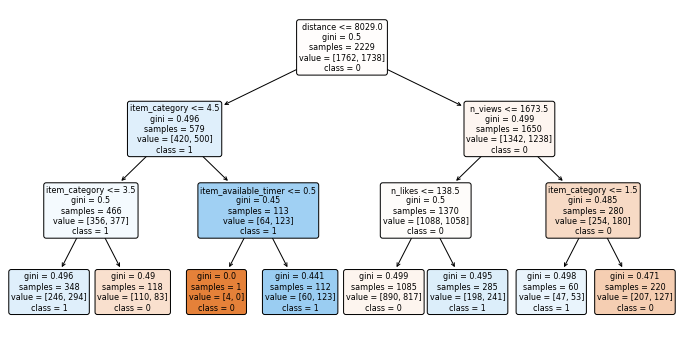

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1273642419)


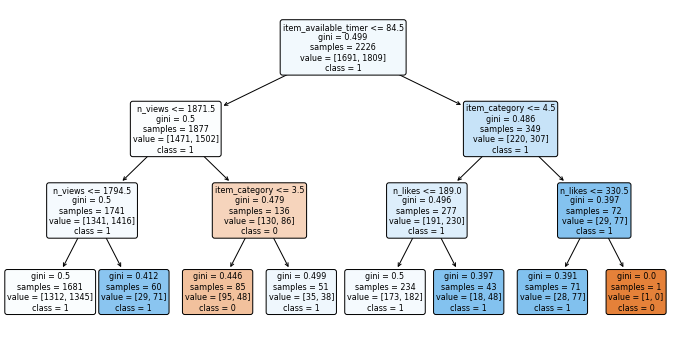

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1935803228)


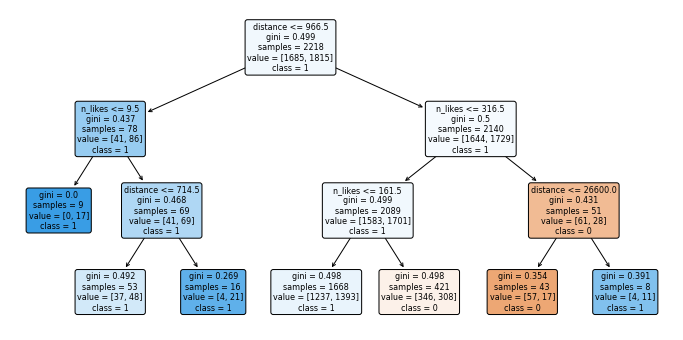

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414)


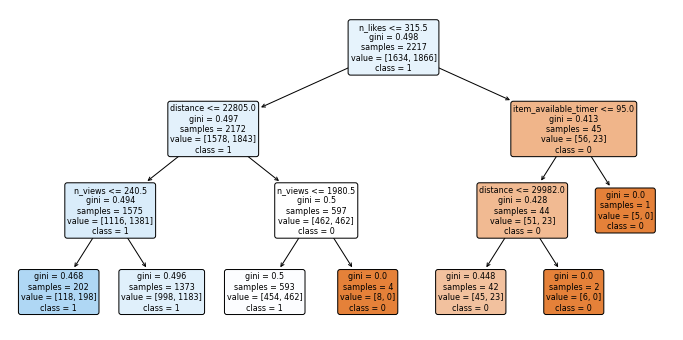

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378)


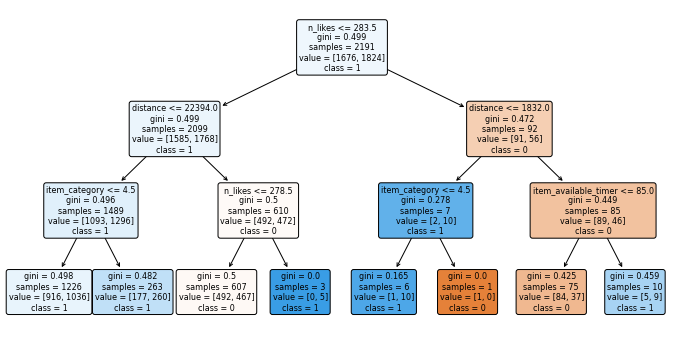

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1201263687)


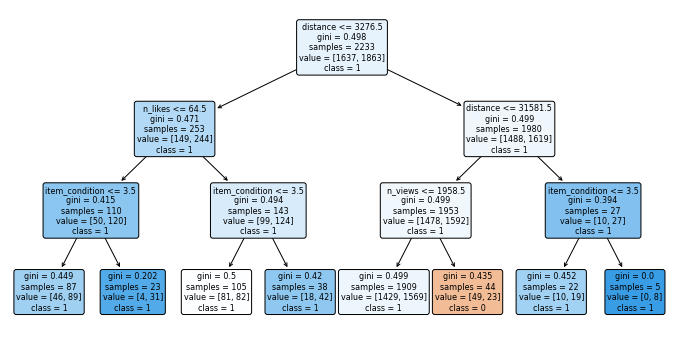

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972)


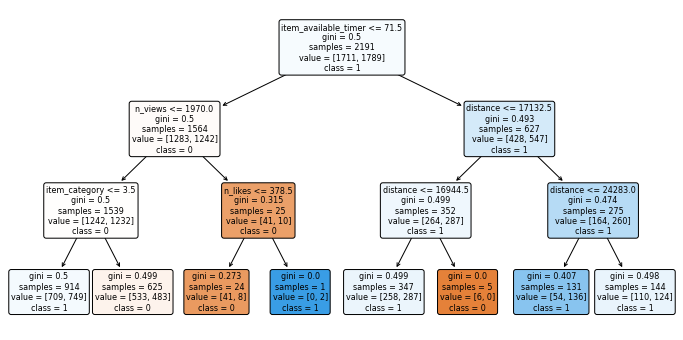

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276)


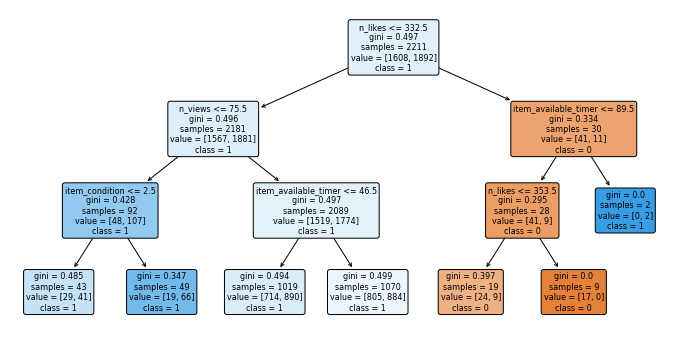

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950)


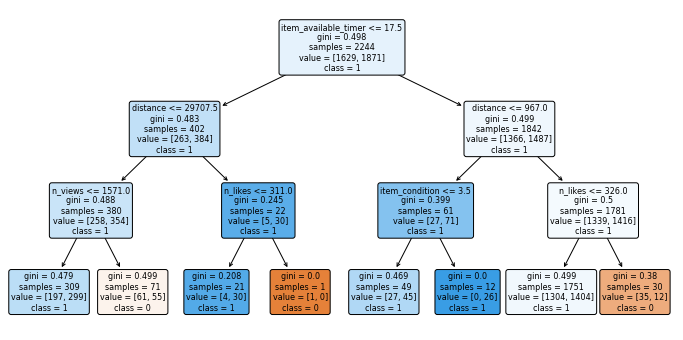

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1914837113)


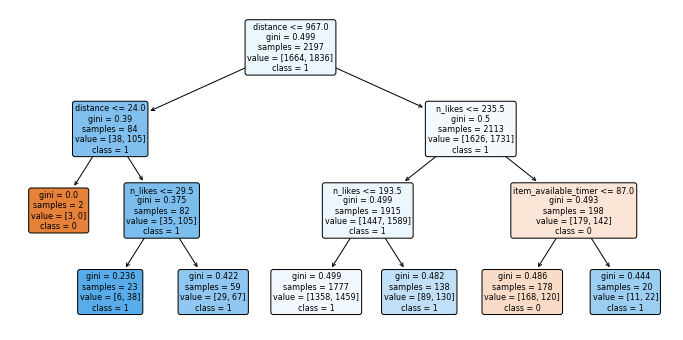

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=669991378)


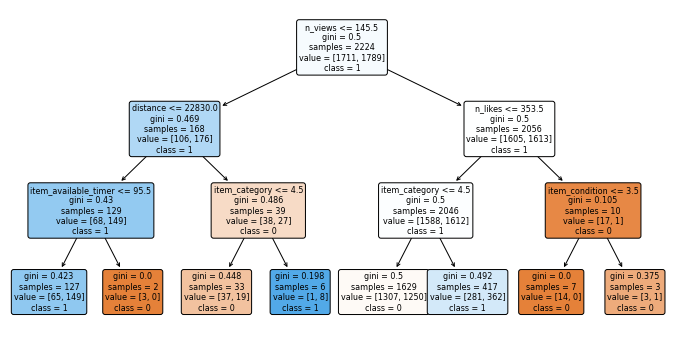

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=429389014)


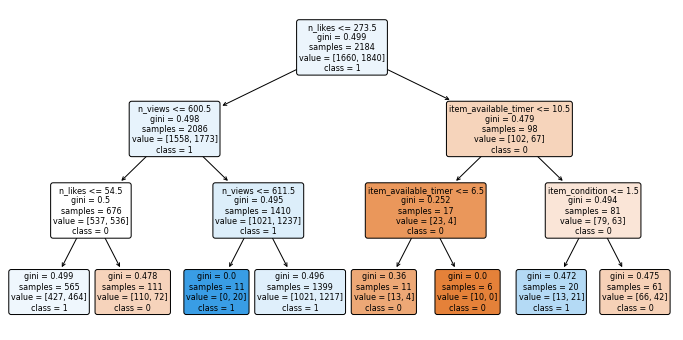

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=249467210)


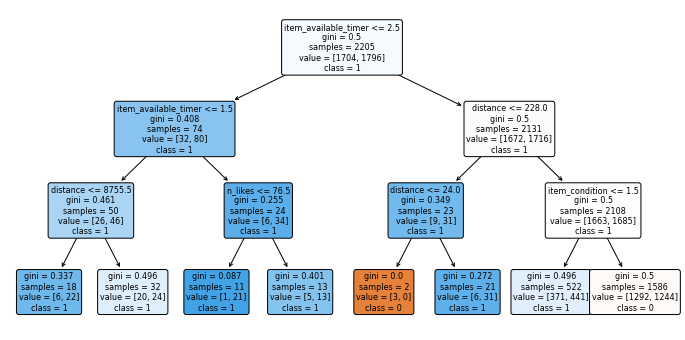

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1972458954)


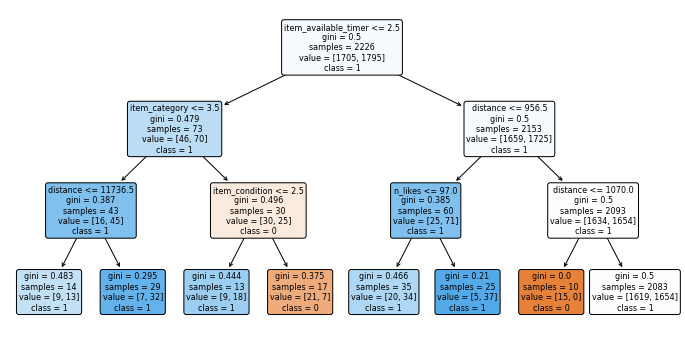

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1572714583)


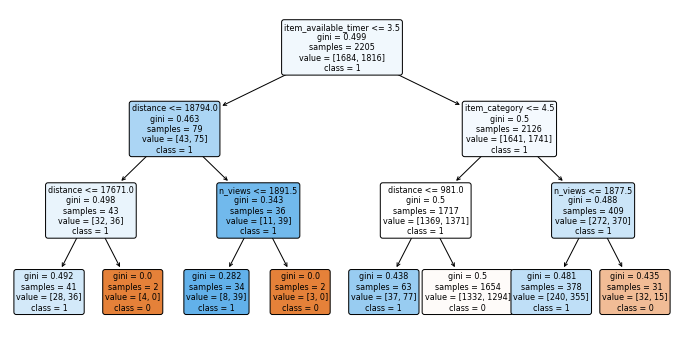

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1433267572)


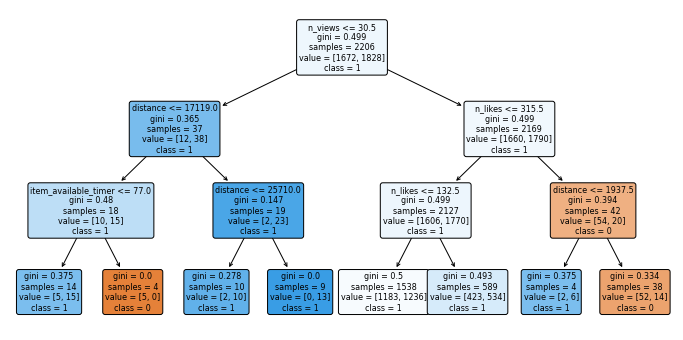

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=434285667)


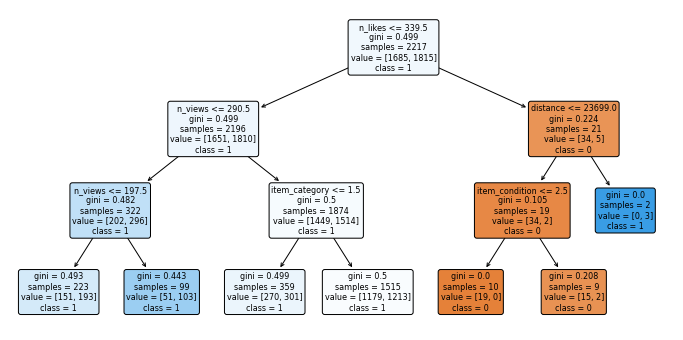

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=613608295)


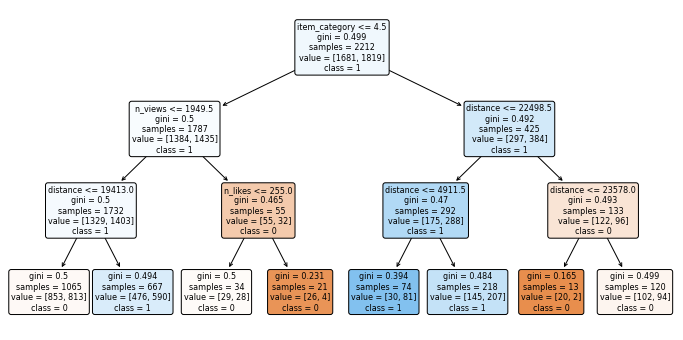

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=893664919)


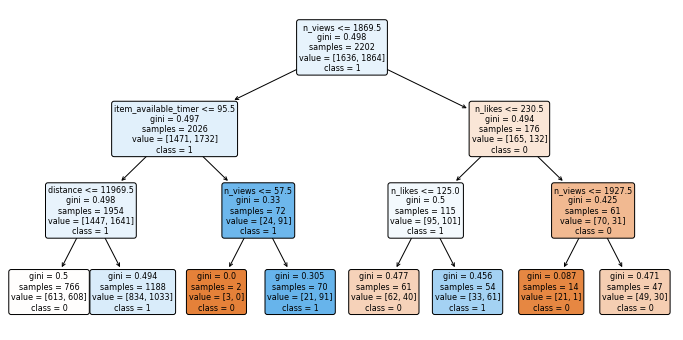

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=648061058)


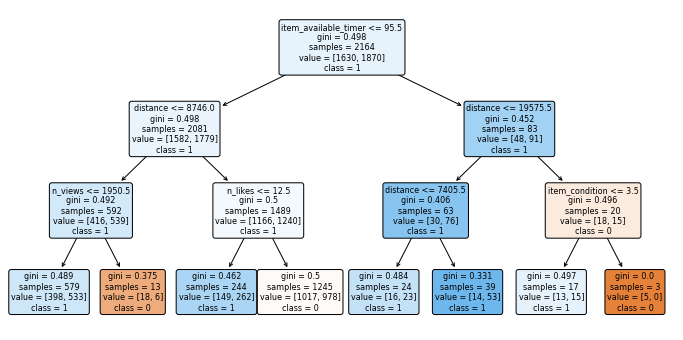

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=88409749)


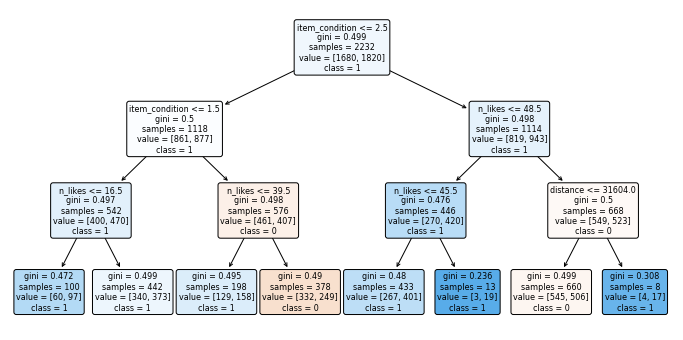

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=242285876)


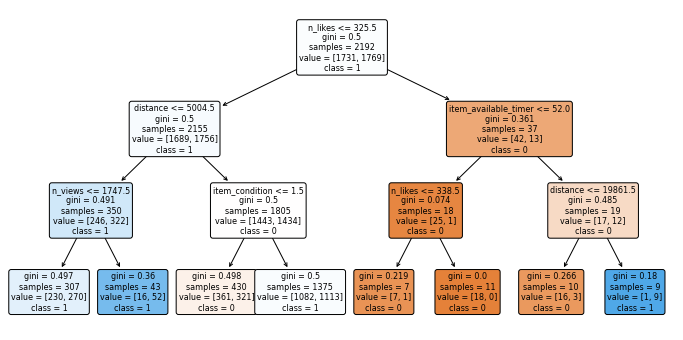

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=2018247425)


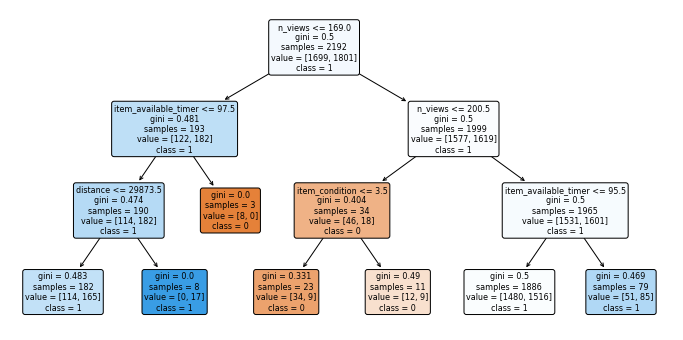

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=953477463)


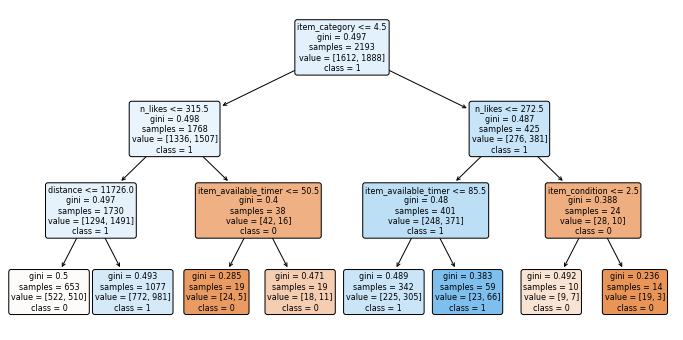

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1427830251)


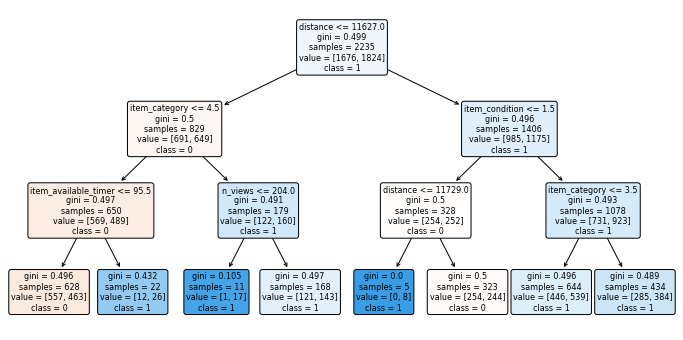

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1883569565)


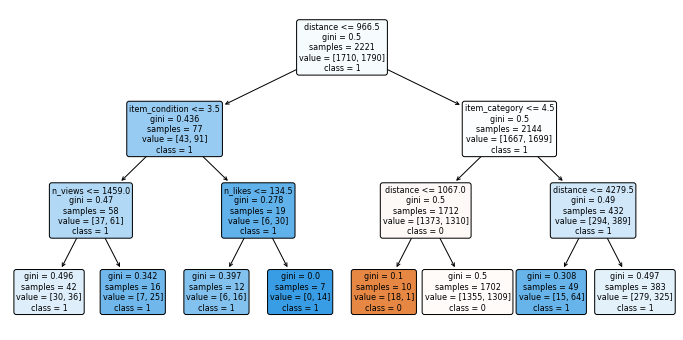

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=911989541)


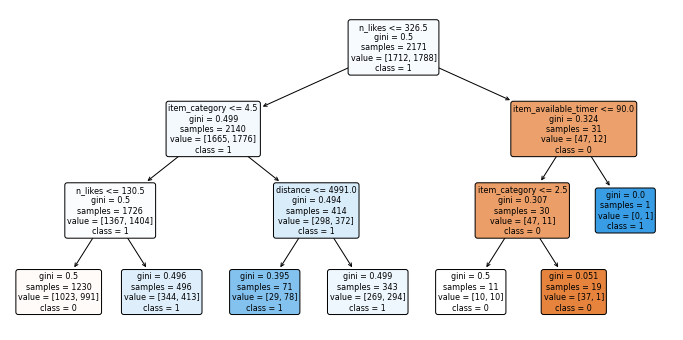

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=3344769)


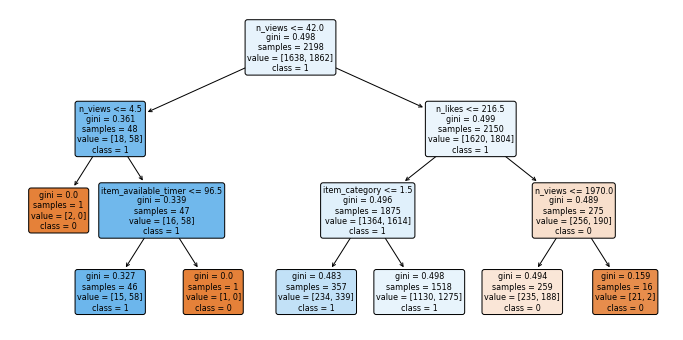

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=780932287)


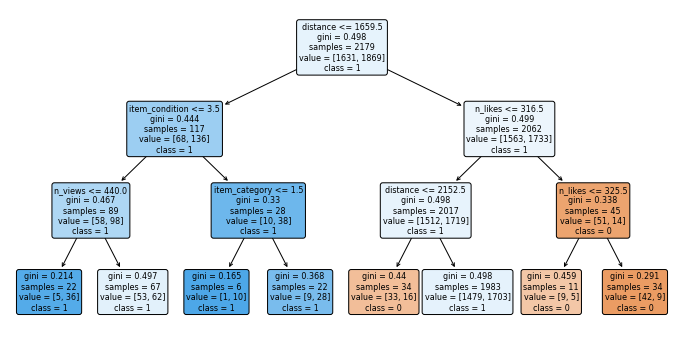

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=2114032571)


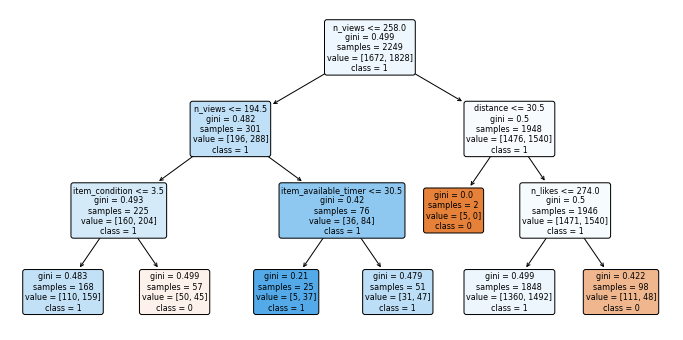

In [281]:
# plot the tree
features = X.columns.values # The name of each column
classes = ['0', '1'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['no', 'yes']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [291]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1score:', f1_score(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
 


Accuracy: 0.48933333333333334
F1score: 0.6450417052826691
Precision:  0.4897959183673469
Recall:  0.9443690637720489


### Other iterations

In [259]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [260]:
rfc = RandomForestClassifier(n_estimators=10, 
                             max_depth=1,
                             random_state=SEED)

In [227]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

In [229]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1score:', f1_score(y_test, y_pred))

Accuracy: 0.512
F1score: 0.6663628076572469


In [285]:
def rfc(test_size,n_estimators,max_depth):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    rfc = RandomForestClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth,
                             random_state=SEED)
    # Fit RandomForestClassifier
    rfc.fit(X_train, y_train)
    # Predict the test set labels
    y_pred = rfc.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1score:', f1_score(y_test, y_pred))
    print('Precision: ',precision_score(y_test, y_pred))
    print('Recall: ',recall_score(y_test, y_pred))
    
    

In [286]:
rfc(.2,2,3)

Accuracy: 0.505
F1score: 0.5857740585774059
Precision:  0.5050505050505051
Recall:  0.6972111553784861


In [287]:
rfc(.3,80,5) 

Accuracy: 0.516
F1score: 0.6062906724511931
Precision:  0.52
Recall:  0.7269180754226268


In [288]:
rfc(.3,3,7)

Accuracy: 0.518
F1score: 0.4968684759916493
Precision:  0.5328358208955224
Recall:  0.4654498044328553


In [289]:
rfc(.2,50,7)

Accuracy: 0.513
F1score: 0.5709251101321586
Precision:  0.525974025974026
Recall:  0.6242774566473989


In [290]:
rfc(.2,95,9)

Accuracy: 0.483
F1score: 0.547681539807524
Precision:  0.4860248447204969
Recall:  0.627254509018036


### Tuning hyperparameters

In [293]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_

In [294]:
model

RandomForestClassifier(max_depth=3, max_features=0.1, max_samples=0.5,
                       n_estimators=185)

In [295]:
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print(indices)
print(item_data.columns[indices])

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]): # X.shape[1] is the number of columns
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1score:', f1_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
    


[4 3 5 2 0 1]
Index(['n_views', 'distance', 'n_likes', 'item_available_timer',
       'item_category', 'item_condition'],
      dtype='object')
Feature ranking:
1. feature 4 (0.258169)
2. feature 3 (0.202811)
3. feature 5 (0.201871)
4. feature 2 (0.172782)
5. feature 0 (0.101123)
6. feature 1 (0.063243)
Accuracy: 0.48933333333333334
F1score: 0.6450417052826691
Precision:  0.4897959183673469
Recall:  0.9443690637720489


The tuned model had the higher F1score and Recall.

#### References:
- https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/
- https://towardsdatascience.com/random-forest-classification-678e551462f5
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/?
- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597
- https://postal-codes.cybo.com/germany/berlin/
- https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1
- https://github.com/KC2016/developing_tech_skills/blob/main/DataScience_WWCode/Intro_to_MachineLearning/2_Classification_Bayes.ipynb